In [ ]:
'''
En los problemas de clasificación se busca patrones en la visualización geómetrica de los cúmulos de información.
Tuvimos la oportunidad de describir estás nubes de datos usando centroides teniendo en cuenta una supuesta clasificación.
En este caso tenemos la información clasificada y queremos el modelo que rige estos cúmulos de datos.
El camino que seguiremos para encontrar este modelo es observar los vecindad para cada categoría o propiedad clasificada.
Cada propiedad prevalecerá en regiones con una alta densidad de información que actúan como centros de atracción.
'''

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Estudiemos una supuesta roca calcarea extrasolar y su composicion porcentual de calcio y silicio
composicion = [[24.2, 20.8], [43.7, 30.3], [58.5, 27.5], [38.5, 26.6], [46.2, 23.2], [40.0, 30.1], [57.4, 20.9], [31.2, 24.4], [55.4, 27.7], [44.8, 25.5], [38.9, 28.4], [40.5, 39.3], [39.4, 34.9], [44.9, 14.9], [39.8, 11.8], [36.1, 74.1], [45.7, 55.0], [41.4, 62.4], [44.7, 61.0], [35.8, 55.3], [35.7, 60.1], [44.2, 48.0], [45.2, 55.4], [36.7, 71.3], [42.8, 59.6], [46.6, 60.2], [42.3, 46.1], [38.7, 57.5], [50.1, 60.4], [41.7, 57.7], [57.9, 34.4], [62.5, 34.6], [59.0, 25.9], [72.4, 24.9], [62.8, 17.7], [49.1, 24.4], [51.4, 35.7], [55.6, 37.9], [63.6, 28.5], [48.3, 24.8], [53.0, 34.1], [53.5, 33.5], [70.5, 29.7], [61.9, 30.0], [70.7, 25.2]]

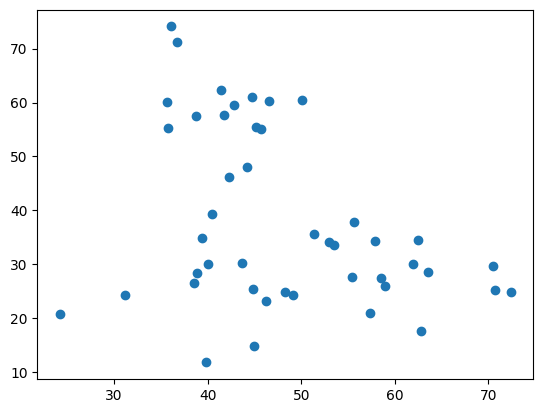

In [3]:
# Observemos la distribución de estas medidad en un plano cartesiano
entrada = np.array(composicion)
e1 = entrada.transpose()[0]
e2 = entrada.transpose()[1]
plt.scatter(e1, e2)
plt.show()

In [35]:
# Buscaremos los 4 pares vecinos más cercanos por cada par porcentual, con una máxima proximidad de 15 
neigh = NearestNeighbors(n_neighbors=4, radius=15)

In [36]:
# Ahora ejecutamos la rutina con los datos recogidos
neigh.fit(entrada)

NearestNeighbors(n_neighbors=4, radius=15)

In [37]:
# Cada par de mediciones será identificado con un número ordinal
distances, indices = neigh.kneighbors(entrada)

In [38]:
# Podemos entonces encontrar los vecinos de cualquier par nuevo
neigh.kneighbors([[60., 50.]], return_distance=False)

array([[37, 28, 16, 31]])

In [ ]:
'''
Esta rutina será la base de la rutina de clasificación.
El objetivo es buscar cúmulos donde la máxima distancia entre datos individuales esté restringida.

'''

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cbook, cm
from sklearn.inspection import DecisionBoundaryDisplay

In [53]:
# El estudio anterior además de medir las composición de ciertos material también hizo pruebas sonoras distinguiendo 3 ecos
# Ecos polisilábicos identificado con el cardinal 0
# Ecos harmónicos identificado con el cardinal 1
# Ecos elípticos identificado con el cardinal 2
ecos = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0]

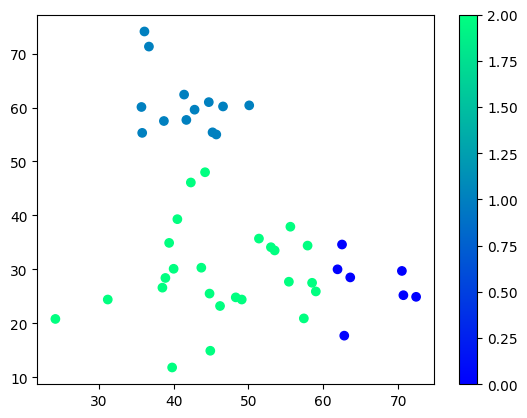

In [97]:
cs = plt.scatter(e1, e2, c=ecos, cmap=cm.winter)
plt.colorbar(cs)
plt.show()

In [92]:
neigh = KNeighborsClassifier(n_neighbors=4)

In [93]:
neigh.fit(entrada, ecos)

KNeighborsClassifier(n_neighbors=4)

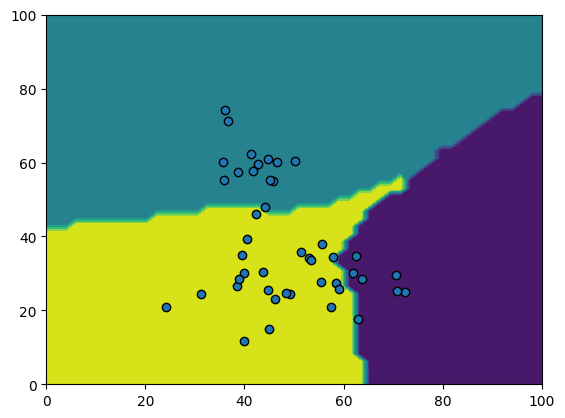

In [94]:
# Una representación gráfica de estas vecindades
peso = np.linspace(0, 100)
g1, g2 = np.meshgrid(peso, peso)
grid = np.vstack([g1.ravel(), g2.ravel()]).T
propiedad_pred = np.reshape(neigh.predict(grid), g1.shape)
display = DecisionBoundaryDisplay(xx0=g1, xx1=g2, response=propiedad_pred)
display.plot()
display.ax_.scatter(e1, e2, edgecolor="black")
plt.show()

In [95]:
neigh.predict([[80, 40]])

array([0])